# Dataset 1 : FIFA

## 1. Visualisasi Data

### a. Histogram

In [4]:
import scipy
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))
data = pd.read_csv('fifa.csv')

# plot grafik historgam
# bin = max - min + 1 = 45 - 16 + 1 = 30 
data['Age'].plot.hist(color='b', alpha=0.5, bins=30, grid = True, rwidth=0.8)
plt.title('Distribution of FIFA player ages')
plt.xlabel('Age')

Text(0.5, 0, 'Age')

### b. Box Plot

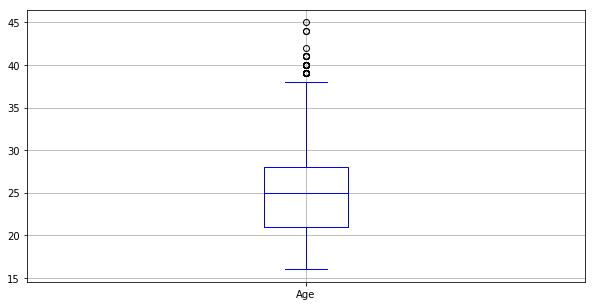

In [105]:
# visualisasi box plot
fig = plt.figure(figsize = (10,5))
data['Age'].plot.box(grid = True, color = 'b')

## 2. Deskripsi Statistik

### a. Minimum Value

In [56]:
data['Age'].min()

16

### b. Maximum value

In [110]:
data['Age'].max()

45

### c. Mean

In [114]:
data['Age'].mean()

25.122205745043114

### d. Mode

In [115]:
data['Age'].mode()

0    21
dtype: int64

### e. Median

In [74]:
data['Age'].median()

25.0

### f. Variance

In [75]:
data['Age'].var()

21.808364946571594

### g. Standar Deviation

In [76]:
data['Age'].std()

4.66994271341433

### h. Skewness

In [40]:
data['Age'].skew()

0.3917641387687474

### i. Kurtosis

In [120]:
data['Age'].kurtosis()

-0.4595135539307731

## 3. Fungsi Distribusi Peluang yang Paling Sesuai

##### Metode yang digunakan :
    1. Menggunakan tes Kolmogorov-Smirnov berdasarkan P-Value
    2. Mencocokkan visualisasi data yang paling mirip

### a. Tes Kolmogorov-Smirnov

In [62]:
class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        # Menyimpan semua jenis-jenis fungsi distribusi (Yang sudah dipelajari)
        self.dist_names = ['beta', 'chi2','expon', 'gamma', 'norm', 'lognorm', 
                           'uniform', 'weibull_min', 'weibull_max'] 
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
    # Fungsi untuk mencari fungsi distribusi yang paling cocok
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Tes Kolmogorov-Smirnov  
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))

        # Mencari fungsi distribusi yang cocok
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        # Menyimpan fungsi distribusi yang cocok and p value nya
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue

# Main program
dst = Distribution()
best_fit, P = dst.Fit(data['Age'])
print("Fungsi Distribusi yang sesuai : " + best_fit)
print("P-Value : " + str(p))

Fungsi Distribusi yang sesuai : beta
P-Value : 7.05360508883961e-41


Berdasarkan tes Kolmogorov-Smirnov fungsi distribusi yang paling sesuai untuk pemodelan dataset Fifa adalah distribusi Beta.

### 3.2. Mencocokkan visualisasi data yang paling mirip

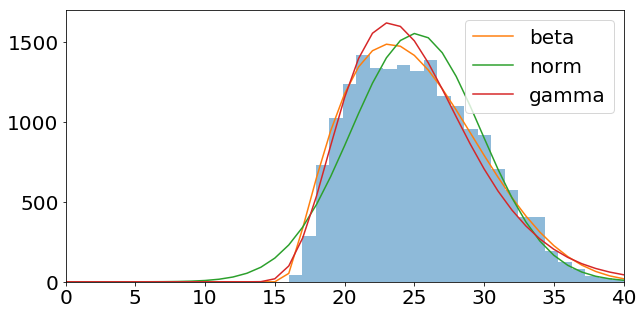

In [7]:
x = scipy.arange(len(data))
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 20})
his = plt.hist(data["Age"], bins=30, alpha = 0.5)

# Nama distribusi
dist_names = ['beta','norm','gamma']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(data["Age"])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,40)
plt.legend(loc='upper right')
plt.show()

Dari perbandingan tesebut yang paling cocok adalah fungsi distribusi beta.

## 4. Soal

Jika terdapat 1000 pemain bola baru, tentukan ekspektasi umur pemain bola yang:

### a. Berumur kurang dari 22 tahun

In [65]:
# Mendapatkan parameter dari fungsi beta
beta = st.beta(a,b,loc,scale)

# Mencari peluang pemain yang kurang dari 22 tahun
peluang, error =  scipy.integrate.quad(beta.pdf,-np.inf,22.5)
print("Peluang pemain yang berumur kurang dari 22 tahun : {:.3f}".format(peluang))
print("Error : {:.10f}".format(error))
jwb = round(peluang * 1000)
print("Jumlah pemain yang berumur kurang dari 22 tahun : {}".format(jwb))

Peluang pemain yang berumur kurang dari 22 tahun : 0.327
Error : 0.0000000085
Jumlah pemain yang berumur kurang dari 22 tahun : 327


### b. Berumur lebuh dari 40 tahun

In [66]:
# Mencari peluang pemain yang lebih dari 40 tahun
temp, error =  scipy.integrate.quad(beta.pdf,-np.inf,40.5)
peluang = 1-temp
print("Peluang pemain yang berumur lebih dari 40 tahun : {:.3f}".format(peluang))
print("Error : {:.10f}".format(error))
jwb = round(peluang * 1000)
print("Jumlah pemain yang berumur lebih dari 40 tahun : {}".format(jwb))

Peluang pemain yang berumur lebih dari 40 tahun : 0.001
Error : 0.0000000085
Jumlah pemain yang berumur lebih dari 40 tahun : 1


# Data set 3 : Black Friday

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
file = pd.read_csv('black_friday.csv',names=['Pembelian'])

## 1. Visualisasi Data

### 1.1 Histogram

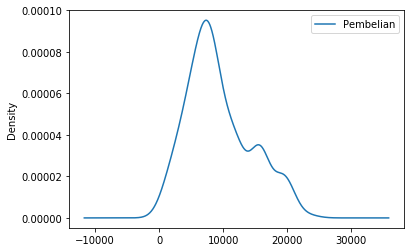

In [93]:
file.plot.kde(bw_method = 0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D43E22BE0>]],
      dtype=object)

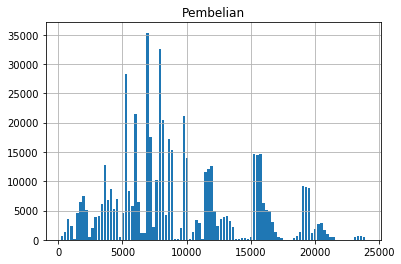

In [94]:
file.hist(bins = 100, rwidth = 0.8)

### 1.2 Box Plot

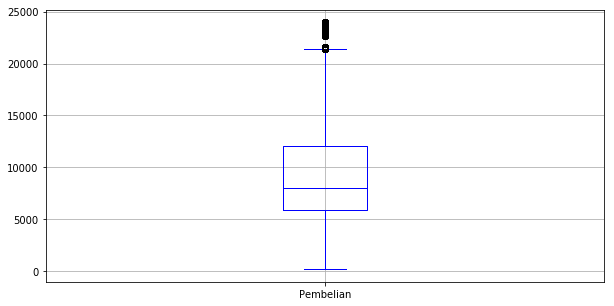

In [116]:
# visualisasi box plot
fig = plt.figure(figsize = (10,5))
file['Pembelian'].plot.box(grid = True, color = 'b')

## 2. Statistical Description

### 2.1 Minimum Value

In [124]:
file['Pembelian'].min()

185

### 2.2 Maximum Value

In [125]:
file['Pembelian'].max()

23961

### 2.3 Mean

In [118]:
file['Pembelian'].mean()

9333.859852635065

### 2.4 Mode

In [117]:
file['Pembelian'].mode()

0    6855
dtype: int64

### 2.5 Median

In [119]:
file['Pembelian'].median()

8062.0

### 2.6 Variance

In [120]:
file['Pembelian'].var()

24810581.48601374

### 2.7 Standard deviation

In [121]:
file['Pembelian'].std()

4981.022132656483

### 2.8 Skewness

In [122]:
file['Pembelian'].skew()

0.6242797316083074

### 2.9 Kurtosis

In [123]:
file['Pembelian'].kurt()

-0.34312137256836284

## 3. Fungsi Distribusi Peluang yang Paling Sesuai

Fungsi distribusi yang paling sesuai yaitu fungsi distribusi hipergeometrik yang bisa diaproksimasi dengan fungsi distribusi binomial karena n/N yang kurang dari 0.5 . Dimana n adalah jumlah data yang akan di-cek sedangkan N adalah jumlah data total.

## 4. Jawaban Dari Pertanyaan

### 4.a. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang

In [105]:
from math import factorial 

In [106]:
# nCr
def combination(n, r):
    return (factorial(n) // ((factorial(r)) * (factorial(n-r))))

In [107]:
# x = nilai peubah acak
# n = banyaknya data
# p = peluang benar
def binom(x, n, p):
    return combination(n, x) * (p**x) * ((1-p)**(n-x))

In [108]:
n = 250

#### 4.a.i. Miskin (total pembelian kurang dari 1000 dolar)

In [109]:
n_poor = file[file['Pembelian'] < 1000] #Banyaknya Miskin
prob_poor = n_poor.size / file.size #Peluang
hasil = 0
for x in range(n):
    fx = binom(x, n, prob_poor)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 250 orang) yang miskin yaitu : "+ str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 250 orang) yang miskin yaitu : 3.0


#### 4.a.ii. Kaya (total pembelian lebih dari 10000 dolar) 

In [110]:
n_rich = file[file['Pembelian'] > 10000] #Banyaknya Rich
prob_rich = n_rich.size / file.size #Peluang
hasil = 0
for x in range(n):
    fx = binom(x, n, prob_rich)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 250 orang) yang Kaya yaitu : " + str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 250 orang) yang Kaya yaitu : 86.0


#### 4.a.iii. Crazy Rich (total pembelian lebih dari 20000 dolar)  

In [111]:
n_crazy_rich = file[file['Pembelian'] > 20000] #Banyaknya Crazy_Rich
prob_crazy_rich = n_crazy_rich.size / file.size #Peluang
hasil = 0
for x in range(n):
    fx = binom(x, n, prob_crazy_rich)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 250 orang) yang Crazy Rich yaitu : " + str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 250 orang) yang Crazy Rich yaitu : 5.0


### 4.b. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli: 


In [112]:
n2 = 1000

#### 4.b.i. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif) 

In [113]:
n_people = file[file['Pembelian'].between(1980, 2000, inclusive = True)] #Banyaknya yg membeli Galaxy Fold
prob_people = n_people.size / file.size #Peluang
hasil = 0
for x in range(n2):
    fx = binom(x, n2, prob_people)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 1000 orang) dengan pengeluaran antara 1980 - 2000 dolar yaitu : " + str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 1000 orang) dengan pengeluaran antara 1980 - 2000 dolar yaitu : 1.0


#### 4.b.ii. MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif) 

In [114]:
n_people = file[file['Pembelian'].between(2707, 2897, inclusive = True)] #Banyaknya yg membeli Galaxy Fold
prob_people = n_people.size / file.size #Peluang
hasil = 0
for x in range(n2):
    fx = binom(x, n2, prob_people)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 1000 orang) dengan pengeluaran antara 2707 - 2897 dolar yaitu : " + str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 1000 orang) dengan pengeluaran antara 2707 - 2897 dolar yaitu : 7.0


# Dataset 3 : Black Friday

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
file = pd.read_csv('black_friday.csv',names=['Pembelian'])

## 1. Visualisasi Data

### 1.1 Histogram

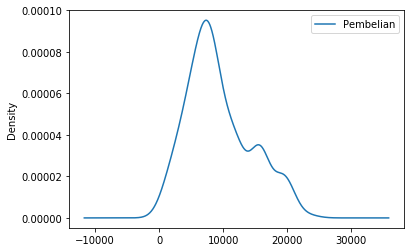

In [93]:
file.plot.kde(bw_method = 0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D43E22BE0>]],
      dtype=object)

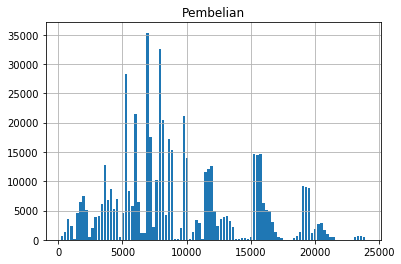

In [94]:
file.hist(bins = 100, rwidth = 0.8)

### 1.2 Box Plot

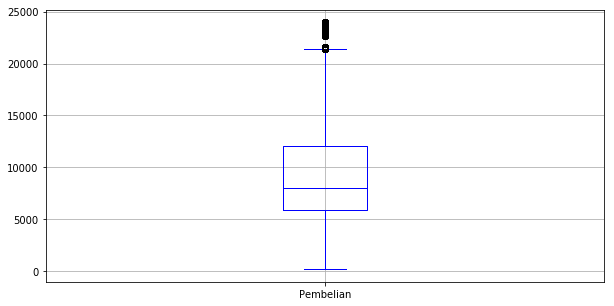

In [116]:
# visualisasi box plot
fig = plt.figure(figsize = (10,5))
file['Pembelian'].plot.box(grid = True, color = 'b')

## 2. Statistical Description

### 2.1 Minimum Value

In [124]:
file['Pembelian'].min()

185

### 2.2 Maximum Value

In [125]:
file['Pembelian'].max()

23961

### 2.3 Mean

In [118]:
file['Pembelian'].mean()

9333.859852635065

### 2.4 Mode

In [117]:
file['Pembelian'].mode()

0    6855
dtype: int64

### 2.5 Median

In [119]:
file['Pembelian'].median()

8062.0

### 2.6 Variance

In [120]:
file['Pembelian'].var()

24810581.48601374

### 2.7 Standard deviation

In [121]:
file['Pembelian'].std()

4981.022132656483

### 2.8 Skewness

In [122]:
file['Pembelian'].skew()

0.6242797316083074

### 2.9 Kurtosis

In [123]:
file['Pembelian'].kurt()

-0.34312137256836284

## 3. Fungsi Distribusi Peluang yang Paling Sesuai

Fungsi distribusi yang paling sesuai yaitu fungsi distribusi hipergeometrik yang bisa diaproksimasi dengan fungsi distribusi binomial karena n/N yang kurang dari 0.5 . Dimana n adalah jumlah data yang akan di-cek sedangkan N adalah jumlah data total.

## 4. Jawaban Dari Pertanyaan

### 4.a. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang

In [105]:
from math import factorial 

In [106]:
# nCr
def combination(n, r):
    return (factorial(n) // ((factorial(r)) * (factorial(n-r))))

In [107]:
# x = nilai peubah acak
# n = banyaknya data
# p = peluang benar
def binom(x, n, p):
    return combination(n, x) * (p**x) * ((1-p)**(n-x))

In [108]:
n = 250

#### 4.a.i. Miskin (total pembelian kurang dari 1000 dolar)

In [109]:
n_poor = file[file['Pembelian'] < 1000] #Banyaknya Miskin
prob_poor = n_poor.size / file.size #Peluang
hasil = 0
for x in range(n):
    fx = binom(x, n, prob_poor)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 250 orang) yang miskin yaitu : "+ str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 250 orang) yang miskin yaitu : 3.0


#### 4.a.ii. Kaya (total pembelian lebih dari 10000 dolar) 

In [110]:
n_rich = file[file['Pembelian'] > 10000] #Banyaknya Rich
prob_rich = n_rich.size / file.size #Peluang
hasil = 0
for x in range(n):
    fx = binom(x, n, prob_rich)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 250 orang) yang Kaya yaitu : " + str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 250 orang) yang Kaya yaitu : 86.0


#### 4.a.iii. Crazy Rich (total pembelian lebih dari 20000 dolar)  

In [111]:
n_crazy_rich = file[file['Pembelian'] > 20000] #Banyaknya Crazy_Rich
prob_crazy_rich = n_crazy_rich.size / file.size #Peluang
hasil = 0
for x in range(n):
    fx = binom(x, n, prob_crazy_rich)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 250 orang) yang Crazy Rich yaitu : " + str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 250 orang) yang Crazy Rich yaitu : 5.0


### 4.b. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli: 


In [112]:
n2 = 1000

#### 4.b.i. Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif) 

In [113]:
n_people = file[file['Pembelian'].between(1980, 2000, inclusive = True)] #Banyaknya yg membeli Galaxy Fold
prob_people = n_people.size / file.size #Peluang
hasil = 0
for x in range(n2):
    fx = binom(x, n2, prob_people)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 1000 orang) dengan pengeluaran antara 1980 - 2000 dolar yaitu : " + str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 1000 orang) dengan pengeluaran antara 1980 - 2000 dolar yaitu : 1.0


#### 4.b.ii. MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif) 

In [114]:
n_people = file[file['Pembelian'].between(2707, 2897, inclusive = True)] #Banyaknya yg membeli Galaxy Fold
prob_people = n_people.size / file.size #Peluang
hasil = 0
for x in range(n2):
    fx = binom(x, n2, prob_people)
    hasil = hasil + (x * fx)
print("Maka ekspektasi jumlah orang (dari 1000 orang) dengan pengeluaran antara 2707 - 2897 dolar yaitu : " + str(np.floor(hasil)))

Maka ekspektasi jumlah orang (dari 1000 orang) dengan pengeluaran antara 2707 - 2897 dolar yaitu : 7.0


# Dataset 4 : Cryptocurrency

## 1. Visualisasi Data

### a. Histogram

Text(0.5, 0, 'Currency')

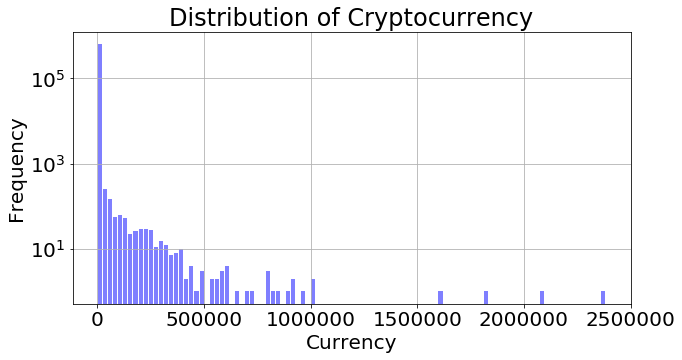

In [8]:
import scipy
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))
data = pd.read_csv('crypto.csv', names = ['Currency'])

# plot grafik historgam
data['Currency'].plot.hist(log = True, color='b', alpha=0.5, bins=100, grid = True, rwidth=0.8)
plt.title('Distribution of Cryptocurrency')
plt.xlabel('Currency')

### b. Box Plot

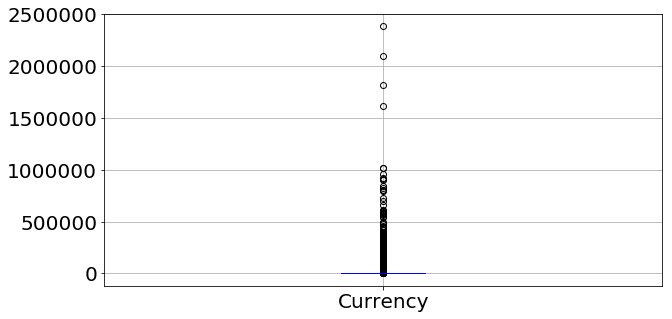

In [9]:
# visualisasi box plot
fig = plt.figure(figsize = (10,5))
data['Currency'].plot.box(grid = True, color = 'b')

## 2. Deskripsi Statistik

### a. Minimum Value

In [10]:
data['Currency'].min()

2.9249999999999997e-09

### b. Maximum value

In [11]:
data['Currency'].max()

2383502.5

### c. Mean

In [12]:
data['Currency'].mean()

203.01814563577602

### e. Median

In [13]:
data['Currency'].median()

0.0097335

### f. Variance

In [14]:
data['Currency'].var()

75320415.21220845

### g. Standar Deviation

In [15]:
data['Currency'].std()

8678.733502776107

### h. Skewness

In [16]:
data['Currency'].skew()

118.23960755632972

### i. Kurtosis

In [17]:
data['Currency'].kurtosis()

22297.470842872517

## 3. Fungsi Distribusi Peluang yang Paling Sesuai


##### Metode yang digunakan :
    1. Menggunakan tes perbandingan visual

### a. Tes Perbandingan Visual

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


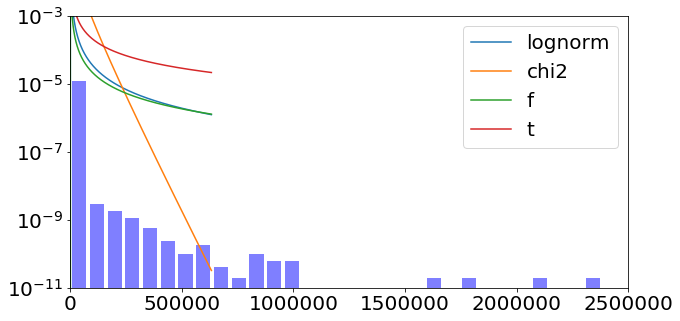

In [18]:
x = scipy.arange(len(data)) #create X axis
plt.figure(figsize=(10,5)) #create plot figure
plt.rcParams.update({'font.size': 20}) #update font
histogram = plt.hist(data['Currency'], bins = 30, color='b', alpha=0.5, rwidth=0.8, normed = True, log = True) #Plot histogram

#Distributions to be compared (determined heuristically)
dist_names = ['lognorm', 'chi2', 'f', 't']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(data['Currency'])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(-1000, 2.5e6)
    plt.ylim(10e-12,10e-4)
    
plt.legend(loc='upper right')
plt.show()

Dari visualisasi yang paling sesuai adalah distribusi lognorm

In [22]:
#For this case we shall be using the built in fit method from the scipy library
def get_best_distribution(data):
    dist_names = ["lognorm"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

best_dist, p, params = get_best_distribution(data["Currency"])
s,loc,scale = params

p value for lognorm = 0.0
Best fitting distribution: lognorm
Best p value: 0.0
Parameters for the best fit: (4.563767614333535, 2.9233071421839433e-09, 0.011720619548577898)


## 4. Soal

Apabila hari ini terdapat 1000 data harga cryptocurrency baru, tentukan ekspektasi jumlah cryptocurrency yang nilainya :

### a. Kurang dari 0.177013

In [23]:
# Mendapatkan parameter fungsi dari lognorm
dist = st.lognorm(s,loc,scale)

# Mencari nilai P(x < 0.177013)
peluang, error = scipy.integrate.quad(dist.pdf,-np.inf,0.177013)

print("Peluang harga cryptocurrency kurang dari 0.177013 : {:.3f}".format(peluang))
print("Error : {:.10f}".format(error))

jwb = round(peluang * 1000)
print("Jumlah harga cryptocurrency kurang dari 0.177013 : {}".format(jwb))

Peluang harga cryptocurrency kurang dari 0.177013 : 0.699
Error : 0.0000000094
Jumlah harga cryptocurrency kurang dari 0.177013 : 699


### b. Lebih dari 177.013

In [24]:
# Mencari nilai P(x > 177.013) = 1 - P(x < 177.013)
temp, error = scipy.integrate.quad(dist.pdf,-np.inf,177.013)
peluang = 1 - temp

print("Peluang harga cryptocurrency lebih dari 177.013 : {:.3f}".format(peluang))
print("Error : {:.10f}".format(error))

jwb = round(peluang * 1000)
print("Jumlah harga cryptocurrency lebih dari 177.013 : {}".format(jwb))

Peluang harga cryptocurrency lebih dari 177.013 : 0.017
Error : 0.0009049352
Jumlah harga cryptocurrency lebih dari 177.013 : 17


C:\Users\user\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


Jika suatu hari terdapat sebuah cryptocurrency baru, tentukan peluang cryptocurrency tersebut bernilai:

### a. Lebih dari 0.013

In [25]:
# Mencari nilai P(x > 0.013) = 1 - P(x < 0.013)
temp, error = scipy.integrate.quad(dist.pdf,-np.inf,0.013)
peluang = 1 - temp

print("Peluang harga cryptocurrency lebih dari 0.013 : {:.3f}".format(peluang))
print("Error : {:.10f}".format(error))

Peluang harga cryptocurrency lebih dari 0.013 : 0.491
Error : 0.0000003678


### b. Kurang dari 17.7

In [26]:
# Mencari nilai P(x < 17.7)
peluang, error = scipy.integrate.quad(dist.pdf,-np.inf,17.7)

print("Peluang harga cryptocurrency kurang dari 0.177013 : {:.3f}".format(peluang))
print("Error : {:.10f}".format(error))

Peluang harga cryptocurrency kurang dari 0.177013 : 0.946
Error : 0.0000260968


# Dataset 5 : Athletes

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import norm 

In [2]:
file = pd.read_csv('athletes.csv')

## 1. Visualisasi Data

### 1.1 Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000152706FC7B8>]],
      dtype=object)

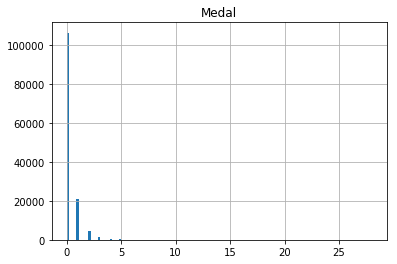

In [3]:
file.hist(bins = 100, rwidth = 0.8)

### 1.2 Box Plot

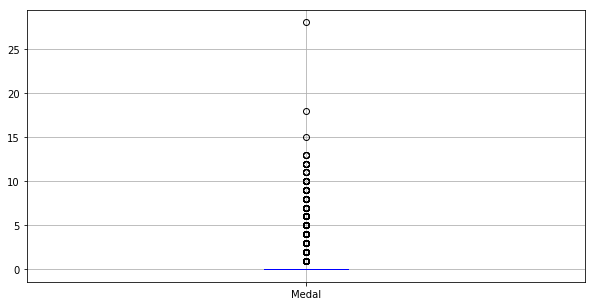

In [59]:
# visualisasi box plot
fig = plt.figure(figsize = (10,5))
file['Medal'].plot.box(grid = True, color = 'b')

## 2. Statistical Description

### 2.1 Minimum Value

In [5]:
file.min()

Name     A Dijiang
Medal            0
dtype: object

### 2.2 Maximum Value

In [6]:
file.max()

Name     zzet nce
Medal          28
dtype: object

### 2.3 Mean

In [7]:
file['Medal'].mean()

0.2952772561622789

### 2.4 Mode

In [8]:
file['Medal'].mode()

0    0
dtype: int64

### 2.5 Median

In [12]:
file['Medal'].median()

0.0

### 2.6 Variance

In [13]:
file['Medal'].var()

0.5252132778008305

### 2.7 Standard deviation

In [15]:
file['Medal'].std()

0.724715998030146

### 2.8 Skewness

In [16]:
file['Medal'].skew()

4.8199987845312

### 2.9 Kurtois

In [18]:
file['Medal'].kurt()

51.562525836059855

## 3. Fungsi Distribusi Peluang yang Paling Sesuai

Fungsi Distribusi Peluang yang paling sesuai yaitu fungsi distribusi peluang binomial. Alasannya karena setiap data bisa dimasukkan kedalam grup-grup mendali tertentu.

## 4. Jawaban Dari Pertanyaan

### 4.a. Peluang Y Meraih

#### 4.a.i. Tepat 0 Medali

In [34]:
n_zero = file[file['Medal'] == 0] #Banyaknya atlet yang memiliki 0 medal
prob_zero = n_zero.size / file.size #Peluang
print("Maka ekspektasi Y tepat 0 medali adalah "+ str(prob_zero))
print("Atau " + str(prob_zero * 100) + ' %')

Maka ekspektasi Y tepat 0 medali adalah 0.7906792052311643
Atau 79.06792052311643 %


#### 4.a.ii. lebih dari 10 medali

In [36]:
n10 = file[file['Medal'] > 10] #Banyaknya atlet yang memiliki lebih dari 10 medal
prob = n10.size / file.size #Peluang
print("Maka ekspektasi Y lebih dari 10 medali adalah "+ str(prob))
print("Atau " + str(prob * 100) + ' %')

Maka ekspektasi Y lebih dari 10 medali adalah 0.00015586613325812174
Atau 0.015586613325812175 %


#### 4.a.iii. tepat 3 Medali

In [39]:
n3 = file[file['Medal'] == 3] #Banyaknya atlet yang memiliki tepat 3 medali
prob = n3.size / file.size #Peluang
print("Maka ekspektasi Y tepat 3 medali adalah "+ str(prob))
print("Atau " + str(prob * 100) + ' %')

Maka ekspektasi Y tepat 3 medali adalah 0.01027974259821422
Atau 1.0279742598214219 %


#### 4.a.iv. 1 atau 5 medali

In [42]:
n1 = file[file['Medal'] == 1] #Banyaknya atlet yang memiliki 1 medal
n5 = file[file['Medal'] == 5] #Banyaknya atlet yang memiliki 5 medal
n_total = n1 + n5
prob = n_total.size / file.size #Peluang
print("Maka ekspektasi Y tepat 1 atau 5 medali adalah "+ str(prob))
print("Atau " + str(prob * 100) + ' %')

Maka ekspektasi Y tepat 1 atau 5 medali adalah 0.1588424341836697
Atau 15.88424341836697 %


### 4.b. Confidence interval 95%

In [48]:
alfa = 0.95
n = file['Medal'][file['Medal']].count()
deviation = file['Medal'].std()
mean = file['Medal'].mean()
pembagi_z = deviation/math.sqrt(n)
z = norm.ppf(1-((1-alfa)/2))
range = z * pembagi_z
bag_kanan = mean + range
bag_kiri = mean - range
print("Didapat Confidence yaitu antara "+ str(bag_kiri) + " sampai " + str(bag_kanan))

Didapat Confidence yaitu antara 0.29140751272097853 sampai 0.29914699960357927
